<img src="images/utfsm.png" alt="" width="200px" align="right"/>
# USM Numérica
## Tema del Notebook
### Objetivos
1. Conocer el funcionamiento de la librerìa sklearn de Machine Learning
2. Aplicar la librerìa sklearn para solucionar problemas de Machine Learning

## Sobre el autor
### Sebastián Flores
#### ICM UTFSM
#### sebastian.flores@usm.cl

## Sobre la presentación
#### Contenido creada en ipython notebook (jupyter)
#### Versión en Slides gracias a RISE de Damián Avila
Software:
* python 2.7 o python 3.1
* pandas 0.16.1
* sklearn 0.16.1

Opcional:
* numpy 1.9.2
* matplotlib 1.3.1

In [49]:
from sklearn import __version__ as vsn
print(vsn)

0.16.1


## 0.1 Instrucciones
Las instrucciones de instalación y uso de un ipython notebook se encuentran en el siguiente [link](link).

Después de descargar y abrir el presente notebook, recuerden:
* Desarrollar los problemas de manera secuencial.
* Guardar constantemente con *`Ctr-S`* para evitar sorpresas.
* Reemplazar en las celdas de código donde diga *`FIX_ME`* por el código correspondiente.
* Ejecutar cada celda de código utilizando *`Ctr-Enter`*

## 0.2 Licenciamiento y Configuración
Ejecutar la siguiente celda mediante *`Ctr-Enter`*.

In [51]:
"""
IPython Notebook v4.0 para python 3.0
Librerías adicionales: numpy, scipy, matplotlib. (EDITAR EN FUNCION DEL NOTEBOOK!!!)
Contenido bajo licencia CC-BY 4.0. Código bajo licencia MIT. 
(c) Sebastian Flores, Christopher Cooper, Alberto Rubio, Pablo Bunout.
"""
# Configuración para recargar módulos y librerías dinámicamente
%reload_ext autoreload
%autoreload 2

# Configuración para graficos en línea
%matplotlib inline

# Configuración de estilo
from IPython.core.display import HTML
HTML(open("./style/slides.css", "r").read())

## 1.- Sobre la librería sklearn
#### Historia
- Nace en 2007, como un Google Summer Project de David Cournapeau. 
- Retomado por Matthieu Brucher para su proyecto de tesis.
- Desde 2010 con soporte por parte de INRIA.
- Actualmente +35 colaboradores.

## 1.- Sobre la librería sklearn
#### Instalación
En python, con un poco de suerte:
```
pip install -U scikit-learn
```
O utilizando Anaconda:

```
conda install scikit-learn
```

## 1.- Sobre la librería sklearn
#### ¿Porqué sklearn?
sklearn viene de scientific toolbox for Machine Learning. scikit learn para los amigos.

Existen multiples scikits, que son "scientific toolboxes" construidos sobre SciPy: [https://scikits.appspot.com/scikits](https://scikits.appspot.com/scikits).

## 2.- Machine Learning 101

Primero que nada... ¿Qué es Machine Learning?

## 2.- Machine Learning 101
#### Ejemplo

Consideremos un dataset consistente en características de diversos animales.

```
[numero],[metros],[metros],[metros],[kilogramos],[]
patas,   ancho,   largo,   alto,    peso,        especie
2,       0.6,     0.4,     1.7,     75,          humano
2,       0.6,     0.4,     1.8,     90,          humano
...
2,       0.5,     0.5,     1.7,     85,          humano
4,       0.2,     0.5,     0,3,     30,          gato
...
4,       0.25,    0.55,    0.32,    32,          gato
4,       0.5,     0.8,     0.3,     50,          perro
...
4,       0.4,     0.4,     0.32,    40,          perro
```

## 2.- Machine Learning 101
### Clustering

Supongamos que no nos han dicho la especie de cada animal. 

¿Podríamos reconocer las distintas especies? 

¿Podríamos reconocer que existen 3 grupos distintos de animales?

## 2.- Machine Learning 101
### Clasificación

Supongamos que conocemos los datos de cada animal y además la especie.

Si alguien llega con las medidas de un animal... ¿podemos decir cuál será la especie?

## 2.- Machine Learning 101
### Regresión

Supongamos que conocemos los datos de cada animal y su especie. 

Si alguien llega con los datos de un animal, excepto el peso... ¿podemos predecir el peso que tendrá el animal?

## 2.- Machine Learning 101
### Definiciones

* Los datos utilizados para predecir son predictores (features), y tipicamente se llama `X`.
* El dato que se busca predecir se llama etiqueta (label) y puede ser numérica o cateǵorica, y tipicamente se llama `y`.

## 3- Generalidades de sklearn
### Imagen resumen

<img src="images/ml_map.png" alt="" width="1000px" align="middle"/>

## 3- Generalidades de sklearn
### Procedimiento General

In [ ]:
from sklearn import HelpfulMethods
from sklearn import AlgorithmIWantToUse

# split data into train and test datasets

# train model

# test model

# use model


## 4- Clustering con sklearn
#### Wine Dataset

Los datos del [Wine Dataset](https://archive.ics.uci.edu/ml/datasets/Wine) son un conjunto de datos clásicos para verificar los algoritmos de clustering. 

<img src="images/wine.jpg" alt="" width="600px" align="middle"/>

Los datos corresponden a 3 cultivos diferentes de vinos de la misma región de Italia, y que han sido identificados con las etiquetas 1, 2 y 3.

## 4- Clustering con sklearn
#### Wine Dataset

Para cada tipo de vino se realizado 13 análisis químicos:

1. Alcohol 
2.  Malic acid 
3. Ash 
4. Alcalinity of ash 
5. Magnesium 
6. Total phenols 
7. Flavanoids 
8. Nonflavanoid phenols 
9. Proanthocyanins 
10. Color intensity 
11. Hue 
12. OD280/OD315 of diluted wines 
13. Proline 


La base de datos contiene 178 muestras distintas en total.

In [ ]:
%%bash
head data/wine_data.csv

## 4- Clustering con sklearn
#### Lectura de datos

In [70]:
import pandas as pd
data = pd.read_csv("data/wine_data.csv")

In [ ]:
data

## 4- Clustering con sklearn
#### Exploración de datos

In [ ]:
data.columns

In [ ]:
data["class"].value_counts()

In [ ]:
data.describe(include="all")

## 4- Clustering con sklearn
#### Exploración gráfica de datos

In [ ]:
from matplotlib import pyplot as plt
data.hist(figsize=(12,20))
plt.show(

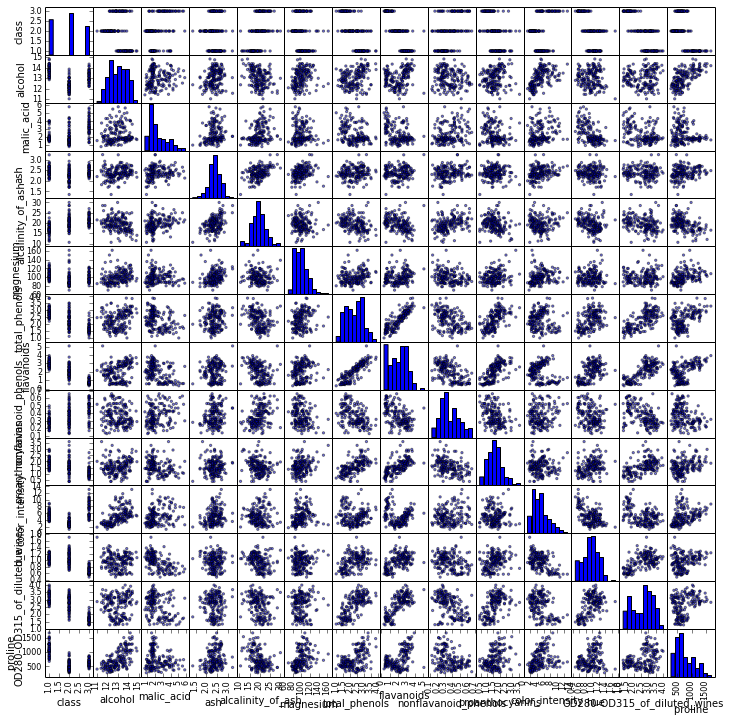

In [78]:
from matplotlib import pyplot as plt
pd.scatter_matrix(data, figsize=(12,12), range_padding=0.2)
plt.show()

## 4- Clustering con sklearn
#### Separación de los datos
Necesitamos separar los datos en los predictores (features) y las etiquetas (labels)

In [ ]:
X = data.drop("class", axis=1)
true_labels = data["class"] -1 # labels deben ser 0, 1, 2, ..., n-1

## Custering
#### Magnitudes de los datos

In [ ]:
print(X.mean())

In [ ]:
print(X.std())

## 4- Clustering con sklearn
#### Algoritmo de Clustering
Apliquemos un algoritmo de clustering directamente

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Parameters
n_clusters = 3

# Running the algorithm
kmeans = KMeans(n_clusters)
kmeans.fit(X)
pred_labels = kmeans.labels_

cm = confusion_matrix(true_labels, pred_labels)
print(cm)

## 4- Clustering con sklearn
#### Normalizacion de datos
Resulta conveniente escalar los datos, para que el algoritmo de clustering funcione mejor

In [ ]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)

In [ ]:
print(X_scaled.mean())

In [ ]:
print(X_scaled.std())

## 4- Clustering con sklearn
#### Algoritmo de Clustering
Ahora podemos aplicar un algoritmo de clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Parameters
n_clusters = 3

# Running the algorithm
kmeans = KMeans(n_clusters)
kmeans.fit(X_scaled)
pred_labels = kmeans.labels_

cm = confusion_matrix(true_labels, pred_labels)
print(cm)

## 4- Clustering con sklearn
#### Regla del codo
En todos los casos hemos utilizado que el número de clusters es igual a 3. En caso que no conociéramos este dato, deberíamos graficar la suma de las distancias a los clusters para cada punto, en función del número de clusters.

In [ ]:
from sklearn.cluster import KMeans

clusters = range(2,20)
total_distance = []
for n_clusters in clusters:
    kmeans = KMeans(n_clusters)
    kmeans.fit(X_scaled)
    pred_labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    # Get the distances
    distance_for_n = 0
    for k in range(n_clusters):
        points = X_scaled[pred_labels==k]
        aux = (points - centroids[k,:])**2
        distance_for_n += (aux.sum(axis=1)**0.5).sum()
    total_distance.append(distance_for_n)

## 4- Clustering con sklearn
Graficando lo anterior, obtenemos

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16,8))
plt.plot(clusters, total_distance, 'rs')
plt.xlim(min(clusters)-1, max(clusters)+1)
plt.ylim(0, max(total_distance)*1.1)
plt.show()

## 4- Clustering con sklearn
¿Qué tan dificil es usar otro algoritmo de clustering?

Nada dificil.

Algoritmos disponibles:
* K-Means
* Mini-batch K-means
* Affinity propagation
* Mean-shift
* Spectral clustering
* Ward hierarchical clustering
* Agglomerative clustering
* DBSCAN
* Gaussian mixtures
* Birch

Lista con detalles: [http://scikit-learn.org/stable/modules/clustering.html](http://scikit-learn.org/stable/modules/clustering.html)

In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# Normalization of data
X_scaled = preprocessing.scale(X)

# Running the algorithm
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
pred_labels = kmeans.labels_

# Evaluating the output
cm = confusion_matrix(true_labels, pred_labels)
print(cm)

[[ 0 59  0]
 [ 3  3 65]
 [48  0  0]]


In [58]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# Normalization of data
X_scaled = preprocessing.scale(X)

# Running the algorithm
kmeans = MiniBatchKMeans(n_clusters=3)
kmeans.fit(X_scaled)
pred_labels = kmeans.labels_

# Evaluating the output
cm = confusion_matrix(true_labels, pred_labels)
print(cm)

[[ 0 59  0]
 [63  5  3]
 [ 0  0 48]]


In [61]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# Normalization of data
X_scaled = preprocessing.scale(X)

# Running the algorithm
kmeans = AffinityPropagation(preference=-300)
kmeans.fit(X_scaled)
pred_labels = kmeans.labels_

# Evaluating the output
cm = confusion_matrix(true_labels, pred_labels)
print(cm)

[[49 10  0]
 [ 3 58 10]
 [ 2  0 46]]


## Clasificación